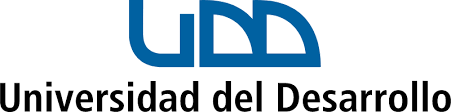

## Tarea N°2: ¿Hay correlación entre edad y comuna con la vacunación?

### Alumno: Claudio Ballerini

### Profesor: Leonardo Ferres

### Fecha: 07/06/2021


Después que empezara la campaña de vacunación, a alguien se le ocurrió decir que había una correlación entre el número de vacunados y las comunas más ricas. Se le olvidó chequear, por supuesto, que la gente de más edad tiende a tener más ingresos.

Su tarea es mostrar y explicar, en dos gráficos, como se correlacionan las vacunas con 1) el estrato socio-económico de las comunas, y 2) el edad promedio de las comunas (en los grupos censales: 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS'). Sólo utilice las comunas de la Region Metropolitana. Finalmente: puede ser que el efecto de que las comunas más ricas se vacunaron primero son las que tienen mayor promedio de edad?

Para medir riqueza de la comuna, utilice: https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv (Enlaces a un sitio externo.)

Para medir poblacion utilice: https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv (Enlaces a un sitio externo.)

Para medir vacunación, tiene buscar los datos en el github del Ministerio de Ciencia.

Evaluación:

1. Encontrar los datos (10%)
2. Pre-proceso y limpieza de datos (30%)
3. Tratamiento de "correlación" (20%)
4. Gráficos (30%)
5. Subir el notebook a github (10%)

Tienen que mandarme, como resultado, el link al github repo con las tareas. Yo voy a abrir el notebook que se llame: "tarea2.ipynb"

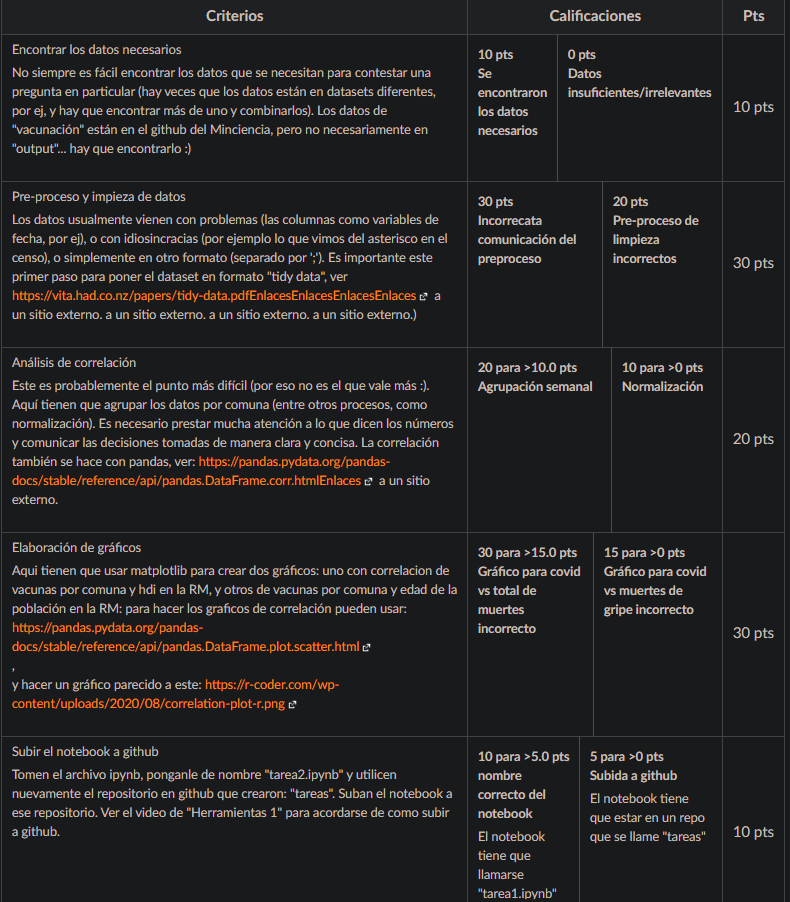

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Lectura de CSV's

In [2]:
Riqueza_SinLimpiar = pd.read_csv("Riqueza_Comuna.csv", sep = ",", header = 0)
Población_SinLimpiar = pd.read_csv("Población.csv", sep = ",", header = 0)

In [3]:
print(Riqueza_SinLimpiar)

    comuna       LEI        II        EI    idh       HDI
0    13101  0.791672  0.873137  0.924099  0.807  0.861222
1    13102  0.782817  0.800343  0.713499  0.743  0.764616
2    13103  0.752447  0.750382  0.657961  0.683  0.718874
3    13104  0.784872  0.760697  0.705426  0.707  0.749584
4    13105  0.777236  0.780019  0.673876  0.711  0.742015
5    13106  0.790810  0.784378  0.729145  0.735  0.767604
6    13107  0.726330  0.775631  0.641707  0.737  0.712375
7    13108  0.821551  0.751105  0.722493  0.709  0.763935
8    13109  0.856570  0.835740  0.860235  0.775  0.850780
9    13110  0.773094  0.824255  0.791155  0.804  0.795888
10   13111  0.763582  0.751721  0.668837  0.689  0.726793
11   13112  0.673794  0.758585  0.642574  0.679  0.689951
12   13113  0.890647  0.948908  0.968223  0.883  0.935337
13   13114  0.909774  0.971056  0.988014  0.933  0.955683
14   13115  0.831115  0.921621  0.813262  0.912  0.854046
15   13116  0.759407  0.784503  0.690043  0.657  0.743558
16   13117  0.

In [4]:
print(Población_SinLimpiar)

        COMUNA EDAD_0A5 EDAD_6A14 EDAD_15A64 EDAD_65YMAS
0         1101        0         0         15           0
1         1101        *         *         54          10
2         1101        *         0         28           *
3         1101        *         7         49           *
4         1101        *         *         26           7
...        ...      ...       ...        ...         ...
180494   15202        *         *          6           4
180495   15202        0         0          0           0
180496   15202        0         0          0           0
180497   15202        *         0          9           *
180498   15202        *         0          0           *

[180499 rows x 5 columns]


#### Tipos de datos presentes en los dos dataframes

In [5]:
Riqueza_SinLimpiar.columns

Index(['comuna', 'LEI', 'II', 'EI', 'idh', 'HDI'], dtype='object')

In [6]:
Población_SinLimpiar.columns

Index(['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS'], dtype='object')

In [7]:
print('Tipos de Datos Riqueza')
print(Riqueza_SinLimpiar.dtypes)
print(" ")
print(" ")
print('Tipos de Datos Población')
print(Población_SinLimpiar.dtypes)

Tipos de Datos Riqueza
comuna      int64
LEI       float64
II        float64
EI        float64
idh       float64
HDI       float64
dtype: object
 
 
Tipos de Datos Población
COMUNA          int64
EDAD_0A5       object
EDAD_6A14      object
EDAD_15A64     object
EDAD_65YMAS    object
dtype: object


#### Limpieza de Datos

¿Existen datos nulos en cada base de datos?

In [8]:
Riqueza_SinLimpiar.isnull().any()

comuna    False
LEI       False
II        False
EI        False
idh        True
HDI       False
dtype: bool

In [9]:
Riqueza_SinLimpiar.isna().any()

comuna    False
LEI       False
II        False
EI        False
idh        True
HDI       False
dtype: bool

In [10]:
Riqueza = Riqueza_SinLimpiar.dropna(axis = 0)

In [11]:
Población_SinLimpiar.isnull().any()

COMUNA         False
EDAD_0A5       False
EDAD_6A14      False
EDAD_15A64     False
EDAD_65YMAS    False
dtype: bool

In [12]:
Población_SinLimpiar.isna().any()

COMUNA         False
EDAD_0A5       False
EDAD_6A14      False
EDAD_15A64     False
EDAD_65YMAS    False
dtype: bool

In [13]:
print('Cuenta de "*" en los datos de riqueza')
print(Riqueza_SinLimpiar[Riqueza_SinLimpiar == '*'].count())
print(" ")
print(" ")
print('Cuenta de "*" en los datos de población')
print(Población_SinLimpiar[Población_SinLimpiar == "*"].count())

Cuenta de "*" en los datos de riqueza
comuna    0
LEI       0
II        0
EI        0
idh       0
HDI       0
dtype: int64
 
 
Cuenta de "*" en los datos de población
COMUNA             0
EDAD_0A5       74387
EDAD_6A14      59515
EDAD_15A64      5060
EDAD_65YMAS    50326
dtype: int64


Por lo tanto, con la ayuda de Notepad++, reemplazaremos el carácter "*" por "NaN", para que la librería pandas pueda limpiar los datos

In [14]:
PoblaciónNuevo = pd.read_csv('PoblaciónNuevo.csv', sep = ',', header = 0)

In [15]:
print(PoblaciónNuevo)

        COMUNA  EDAD_0A5  EDAD_6A14  EDAD_15A64  EDAD_65YMAS
0         1101       0.0        0.0        15.0          0.0
1         1101       NaN        NaN        54.0         10.0
2         1101       NaN        0.0        28.0          NaN
3         1101       NaN        7.0        49.0          NaN
4         1101       NaN        NaN        26.0          7.0
...        ...       ...        ...         ...          ...
180494   15202       NaN        NaN         6.0          4.0
180495   15202       0.0        0.0         0.0          0.0
180496   15202       0.0        0.0         0.0          0.0
180497   15202       NaN        0.0         9.0          NaN
180498   15202       NaN        0.0         0.0          NaN

[180499 rows x 5 columns]


In [16]:
Valores_Faltantes = PoblaciónNuevo.isnull().sum(min_count = 1)
print('Cuenta de datos faltantes en los datos de Población')
print(Valores_Faltantes)

Cuenta de datos faltantes en los datos de Población
COMUNA             0
EDAD_0A5       74387
EDAD_6A14      59515
EDAD_15A64      5060
EDAD_65YMAS    50326
dtype: int64


Finalmente, la cuenta de los datos faltantes como "NaN" coincide con la cuenta de datos faltantes como "*" en el dataframe de Población, por lo tanto, se procede a la limpieza de datos:

In [17]:
Población = PoblaciónNuevo.dropna(axis = 0)
print(Población)

        COMUNA  EDAD_0A5  EDAD_6A14  EDAD_15A64  EDAD_65YMAS
0         1101       0.0        0.0        15.0          0.0
5         1101      18.0       17.0       116.0          9.0
7         1101      39.0       47.0       334.0         36.0
8         1101      18.0       26.0       144.0         15.0
9         1101       8.0       17.0        93.0         14.0
...        ...       ...        ...         ...          ...
180490   15202       0.0        0.0         6.0         10.0
180491   15202       0.0        0.0         0.0          0.0
180493   15202       0.0        0.0        11.0          4.0
180495   15202       0.0        0.0         0.0          0.0
180496   15202       0.0        0.0         0.0          0.0

[90439 rows x 5 columns]


### Analisis Descriptivo

In [18]:
Población.describe()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
count,90439.000000,90439.000000,90439.000000,90439.000000,90439.000000
mean,9377.952421,12.103926,17.655867,99.422638,15.912040
std,3824.690056,17.251066,24.422874,144.486897,20.130765
min,1101.000000,0.000000,0.000000,0.000000,0.000000
25%,6101.000000,5.000000,7.000000,42.000000,6.000000
50%,9115.000000,8.000000,11.000000,65.000000,11.000000
75%,13119.000000,13.000000,19.000000,104.000000,19.000000
max,15202.000000,432.000000,825.000000,9102.000000,763.000000


In [19]:
Riqueza.describe()

,comuna,LEI,II,EI,idh,HDI
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,13144.297297,0.791131,0.818313,0.761793,0.762865,0.789123
std,93.492087,0.062754,0.070445,0.122667,0.076155,0.080864
min,13101.000000,0.667144,0.738680,0.605335,0.657000,0.689951
25%,13110.000000,0.752447,0.767565,0.673876,0.709000,0.731645
50%,13119.000000,0.782817,0.790376,0.722493,0.737000,0.762931
75%,13128.000000,0.821551,0.842243,0.813262,0.804000,0.838293
max,13604.000000,0.917316,0.996899,1.078779,0.949000,0.994584


### ¿Qué tal si...?

Se cuenta la cantidad de población por comuna...

Como se puede apreciar en el dataset, vemos que se repiten las comunas correspondientes por lo tanto, se convertirá las filas repetidas en una sola respetando los rangos de edad

Agruparemos las comunas por regiones de acuerdo al proyecto de base de datos de los códigos terrenales para Chile
(https://github.com/knxroot/bdcut-cl)

In [20]:
Códigos = pd.read_csv('Códigos_Territoriales.csv', sep = ',', header = 0)

In [21]:
Códigos.dtypes

COMUNA_NOMBRE       object
COMUNA_ID            int64
PROVINCIA_NOMBRE    object
PROVINCIA_ID         int64
REGION_NOMBRE       object
REGION_ID            int64
dtype: object

In [22]:
Serie_Comuna = Población['COMUNA']
Serie_Region = Códigos[['COMUNA_ID' , 'REGION_ID']]

In [23]:
Diccionario = dict(zip(Códigos['COMUNA_ID'], Códigos['REGION_ID']))

In [24]:
Cod_Region = Población["COMUNA"].map(Diccionario)


In [25]:
Lista = []

In [26]:
for i in Cod_Region:
    Lista.append(i)

In [27]:
Población_Nueva = Población.assign(REGION = Lista)

In [28]:
Población_Nueva = Población_Nueva[['REGION', 'COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']]

In [29]:
Población_Nueva

,REGION,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1,1101,0.0,0.0,15.0,0.0
5,1,1101,18.0,17.0,116.0,9.0
7,1,1101,39.0,47.0,334.0,36.0
8,1,1101,18.0,26.0,144.0,15.0
9,1,1101,8.0,17.0,93.0,14.0
...,...,...,...,...,...,...
180490,15,15202,0.0,0.0,6.0,10.0
180491,15,15202,0.0,0.0,0.0,0.0
180493,15,15202,0.0,0.0,11.0,4.0
180495,15,15202,0.0,0.0,0.0,0.0


In [30]:
Población_Final = Población_Nueva[Población_Nueva['REGION']==13]

In [31]:
Población_Final

,REGION,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
121508,13,13101,24.0,18.0,299.0,80.0
121510,13,13101,30.0,27.0,636.0,83.0
121511,13,13101,14.0,10.0,337.0,55.0
121513,13,13101,8.0,6.0,103.0,19.0
121514,13,13101,10.0,12.0,232.0,29.0
...,...,...,...,...,...,...
172569,13,13605,8.0,16.0,54.0,5.0
172570,13,13605,23.0,25.0,147.0,27.0
172572,13,13605,8.0,12.0,65.0,16.0
172576,13,13605,20.0,19.0,164.0,32.0


In [32]:
Población_Final1 = Población_Final.groupby(['REGION', 'COMUNA']).sum()

Finalmente, se obtiene los datos de la población, agrupados por las comunas de la región metropolitana

In [33]:
Población_Final1['Total'] = (Población_Final1['EDAD_0A5'] + Población_Final1['EDAD_6A14'] + Población_Final1['EDAD_15A64'] + 
                             Población_Final1['EDAD_65YMAS'])


In [58]:
Población_Final1

EDAD_0A5  EDAD_6A14  EDAD_15A64  EDAD_65YMAS     Total
REGION COMUNA                                                        
13     13101    22178.0    23408.0    298974.0      25893.0  370453.0
       13102     5805.0     8211.0     44461.0       7340.0   65817.0
       13103     9622.0    13738.0     79276.0      14627.0  117263.0
       13104     8561.0    11982.0     71983.0      14064.0  106590.0
       13105    11855.0    17721.0     95040.0      16966.0  141582.0
       13106     9220.0    11613.0     88970.0      13725.0  123528.0
       13107     8268.0    12816.0     59596.0       8356.0   89036.0
       13108     7141.0     8239.0     64267.0       9279.0   88926.0
       13109     6138.0     8808.0     55429.0      11383.0   81758.0
       13110    23692.0    34927.0    211568.0      37909.0  308096.0
       13111     8433.0    11977.0     70664.0      12345.0  103419.0
       13112    14752.0    21632.0    103676.0      14624.0  154684.0
       13113     5379.0     8736.0     52383.0      11260.0   77758.0
       13114    17330.0    22376.0    176073.0      39740.0  255519.0
       13115     7714.0    13916.0     61908.0       7173.0   90711.0
       13116     7532.0    10835.0     63071.0      10753.0   92191.0
       13117     6484.0     9425.0     56999.0      11512.0   84420.0
       13118     7304.0     9969.0     68310.0      13717.0   99300.0
       13119    31131.0    48175.0    281768.0      36939.0  398013.0
       13120    13334.0    15046.0    131216.0      25708.0  185304.0
       13121     6583.0     9396.0     58434.0      11983.0   86396.0
       13122    16644.0    26561.0    144290.0      21856.0  209351.0
       13123     8189.0     8077.0     92140.0      20051.0  128457.0
       13124    16726.0    24056.0    135339.0      17058.0  193179.0
       13125    14583.0    23079.0    115138.0       9009.0  161809.0
       13126     7367.0    10369.0     68479.0      12134.0   98349.0
       13127    10943.0    15351.0     99288.0      17384.0  142966.0
       13128    11293.0    16220.0     84111.0      12499.0  124123.0
       13129     5943.0     8231.0     54102.0      11216.0   79492.0
       13130     7545.0     9270.0     69236.0      11872.0   97923.0
       13131     6016.0     8643.0     49597.0      10730.0   74986.0
       13132     6133.0     7628.0     46715.0      12726.0   73202.0
       13201    39603.0    58340.0    309290.0      34113.0  441346.0
       13202     1910.0     2862.0     15502.0       2301.0   22575.0
       13203     1007.0     1586.0      9422.0       1426.0   13441.0
       13301    12779.0    17850.0     79890.0       7303.0  117822.0
       13302     8474.0    12010.0     53607.0       5025.0   79116.0
       13303     1309.0     1870.0      9824.0       1423.0   14426.0
       13401    22273.0    32657.0    162155.0      20259.0  237344.0
       13402     6747.0     9688.0     49690.0       6410.0   72535.0
       13403     1656.0     2576.0     13427.0       1777.0   19436.0
       13404     5047.0     7656.0     39227.0       5714.0   57644.0
       13501     8611.0    12609.0     66454.0      10967.0   98641.0
       13502      302.0      404.0      2340.0        316.0    3362.0
       13503     2192.0     3161.0     17439.0       3095.0   25887.0
       13504      684.0     1067.0      5646.0        933.0    8330.0
       13505      602.0      877.0      4478.0        989.0    6946.0
       13601     5258.0     7702.0     40812.0       5921.0   59693.0
       13602     2712.0     3745.0     19311.0       3017.0   28785.0
       13603     2367.0     3570.0     18534.0       2980.0   27451.0
       13604     4667.0     6344.0     33426.0       4389.0   48826.0
       13605     6697.0    10093.0     50919.0       7414.0   75123.0

Ahora, necesitamos abrir el dataset de vacunación, correspondiente al producto 80 del repositorio de github de minciencias
(https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto80)


In [35]:
Vacunación = pd.read_csv('Vacunacion_comuna_2daDosis.csv', header = 0, sep = ',')

In [36]:
Vacunación_rm = Vacunación[Vacunación['Codigo region'] == 13]

In [37]:
Ultima_fila = 52

In [38]:
Vacunación_rm = Vacunación_rm.drop(Vacunación_rm.index[Ultima_fila])

In [39]:
Lista_Columnas = list(Vacunación_rm)
Lista_Columnas.remove('Region')
Lista_Columnas.remove('Codigo region')
Lista_Columnas.remove('Comuna')
Lista_Columnas.remove('Codigo comuna')
Lista_Columnas.remove('Poblacion')


Suma = Vacunación_rm[Lista_Columnas].sum(axis = 1)

In [40]:
Vacunación_rm['TOTAL VACUNADOS'] = Suma

In [41]:
Vacunaciónrm_Final = Vacunación_rm[['Region', 'Comuna', 'Codigo region', 'Codigo comuna', 'TOTAL VACUNADOS']]

In [42]:
Correlación_Riqueza = Vacunaciónrm_Final[['Codigo comuna', 'TOTAL VACUNADOS']]

Indice = Riqueza_SinLimpiar.loc[:, 'HDI']

lista1 = []

for i in Indice:
    lista1.append(i)

In [43]:
CR = Correlación_Riqueza.sort_values(by = 'Codigo comuna', ascending = True)

In [44]:
len(lista1)

52

In [45]:
len(Correlación_Riqueza)

52

In [46]:
CR['HDI'] = lista1

In [61]:
CR

,Codigo comuna,TOTAL VACUNADOS,HDI
136,13101.0,198718.0,0.861222
91,13102.0,32756.0,0.764616
92,13103.0,43439.0,0.718874
94,13104.0,60789.0,0.749584
96,13105.0,58653.0,0.742015
98,13106.0,58623.0,0.767604
99,13107.0,51102.0,0.712375
100,13108.0,53392.0,0.763935
102,13109.0,39383.0,0.850780
103,13110.0,172610.0,0.795888


In [48]:
CR[['TOTAL VACUNADOS','HDI']].corr(method = 'pearson')

,TOTAL VACUNADOS,HDI
TOTAL VACUNADOS,1.000000,0.486391
HDI,0.486391,1.000000


[[1.         0.48639066]
 [0.48639066 1.        ]]


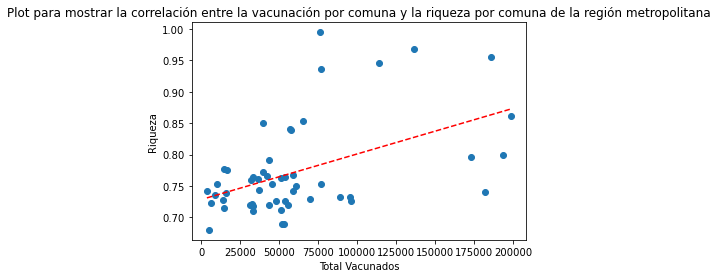

In [49]:
x = CR['TOTAL VACUNADOS']
y = CR['HDI']

print(np.corrcoef(x, y))

plt.scatter(x, y, marker = 'o') 
plt.title('Plot para mostrar la correlación entre la vacunación por comuna y la riqueza por comuna de la región metropolitana')
plt.xlabel('Total Vacunados')
plt.ylabel('Riqueza')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r--',color='red')
plt.show()

Correlación Población / Vacunados

Por lo tanto, de la correlación entre el total de vacunados y la riqueza por comuna, se puede apreciar que tanto comunas con mucha riqueza, como comunas con poca riqueza, han alcanzado un valor alto de total de vacunados por comuna.

## Código restante

In [50]:

Vacunados_Edad = pd.read_csv('total_vacunados_region_edad_std.csv', sep = ',', header = 0)
Vacunados_Edad.head()

,Region,Dosis,Edad,Cantidad
0,Total,Primera,15,0.0
1,Total,Segunda,15,0.0
2,Antofagasta,Primera,15,0.0
3,Antofagasta,Segunda,15,0.0
4,Arica y Parinacota,Primera,15,0.0


In [51]:
Vacunados_Edad1 = Vacunados_Edad[Vacunados_Edad['Region']== 'Metropolitana']

In [52]:
Vacunados_Edad2 = Vacunados_Edad1[Vacunados_Edad1['Dosis'] == 'Segunda']

In [77]:
Vacunados_Edad2

,Region,Dosis,Edad,Cantidad
29,Metropolitana,Segunda,15,0.0
65,Metropolitana,Segunda,16,0.0
101,Metropolitana,Segunda,17,0.0
137,Metropolitana,Segunda,18,11640.0
173,Metropolitana,Segunda,19,14649.0
...,...,...,...,...
2225,Metropolitana,Segunda,76,32303.0
2261,Metropolitana,Segunda,77,29324.0
2297,Metropolitana,Segunda,78,27555.0
2333,Metropolitana,Segunda,79,25108.0


In [53]:
Vacunados_Edad3 = Vacunados_Edad2[['Edad', 'Cantidad']].copy()

In [64]:
EDAD0A5 = Vacunados_Edad3[Vacunados_Edad3['Edad'] <= 5]

EDAD_6A14 = Vacunados_Edad3[Vacunados_Edad3['Edad'] >= 6]
EDAD_6A14 = Vacunados_Edad3[Vacunados_Edad3['Edad'] <= 14]

EDAD_15A64 = Vacunados_Edad3[Vacunados_Edad3['Edad'] >= 15]
EDAD_15A64 = Vacunados_Edad3[Vacunados_Edad3['Edad'] <= 64]

EDAD_65YMAS = Vacunados_Edad3[Vacunados_Edad3['Edad'] >= 65]

In [73]:
Poblacion_Comuna = pd.read_csv('poblacion_comuna_edad.csv', sep = ',', header = 0)
Poblacion_Comuna

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,3549.0,3675.0,...,1587.0,1448.0,1394.0,1321.0,1241.0,1175.0,1094.0,982.0,880.0,6448.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,7.0,8.0,...,15.0,13.0,11.0,10.0,9.0,8.0,7.0,6.0,6.0,50.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,8.0,10.0,...,9.0,8.0,8.0,8.0,7.0,4.0,3.0,4.0,3.0,23.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,118.0,113.0,...,14.0,13.0,14.0,16.0,17.0,17.0,16.0,13.0,11.0,88.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,1.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,8.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,4.0,7.0,...,6.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,9.0


In [76]:
Poblacion_Comuna1 = Poblacion_Comuna[Poblacion_Comuna['Codigo region'] == 13]
Poblacion_Comuna1

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,77.0,79.0,...,46.0,42.0,40.0,36.0,32.0,30.0,29.0,29.0,29.0,236.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,1445.0,1430.0,...,561.0,521.0,502.0,461.0,414.0,381.0,348.0,323.0,296.0,2160.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,397.0,408.0,...,159.0,146.0,141.0,128.0,110.0,97.0,87.0,82.0,76.0,607.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,1216.0,1308.0,...,530.0,504.0,497.0,473.0,440.0,411.0,380.0,363.0,353.0,2538.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,1882.0,1964.0,...,1091.0,997.0,963.0,901.0,827.0,756.0,683.0,626.0,565.0,3690.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,2431.0,2392.0,...,681.0,605.0,558.0,502.0,442.0,399.0,357.0,326.0,286.0,1934.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,1704.0,1783.0,...,1007.0,939.0,941.0,927.0,895.0,841.0,787.0,744.0,709.0,5442.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,451.0,452.0,...,261.0,237.0,226.0,206.0,190.0,176.0,168.0,157.0,143.0,970.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,2262.0,2314.0,...,1234.0,1153.0,1117.0,1049.0,957.0,881.0,808.0,751.0,688.0,4764.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,522.0,525.0,...,242.0,218.0,210.0,194.0,182.0,164.0,152.0,141.0,133.0,940.0


In [69]:
x = EDAD_15A64['Cantidad']
y = Población_Final['EDAD_15A64']

print(np.corrcoef(x, y))

plt.scatter(x, y, marker = 'o') 
plt.title('Plot para mostrar la correlación entre la vacunación por comuna y la riqueza por comuna de la región metropolitana')
plt.xlabel('Total Vacunados')
plt.ylabel('Riqueza')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r--',color='red')
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 50 and the array at index 1 has size 32600